<a href="https://colab.research.google.com/github/Pheol9166/AIstudy/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression
!ls

student-performance-multiple-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)
kaggle.json  Student_Performance.csv
sample_data  student-performance-multiple-linear-regression.zip


In [2]:
!unzip student-performance-multiple-linear-regression.zip

Archive:  student-performance-multiple-linear-regression.zip
replace Student_Performance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Student_Performance.csv  


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Dataset
# 기존의 책에선 load_boston 함수를 사용하여 Boston Housing Dataset을 가져왔으나, scikit-learn 1.2 version부턴 없어졌기에 다른 데이터로 대체하겠음

dataset = pd.read_csv("./Student_Performance.csv")
dataset
# Extracurricular activities: 더미변수

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [5]:
# 데이터 전처리
data = dataset.iloc[:,:-1]
target = dataset.iloc[:,-1]
data['Extracurricular Activities'] = list(map(lambda x: 1 if x == "Yes" else 0, data['Extracurricular Activities'])) # Yes / No 데이터를 숫자로 바꿈
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [6]:
# train, test data split
# 1. 7:3의 비율로 나눔
X_train, X_test = data.iloc[:int(len(data)*0.7)], data.iloc[int(len(data)*0.7):]
y_train, y_test = target.iloc[:int(len(target)*0.7)], target.iloc[int(len(target)*0.7):]

# 2. sklearn의 train_test_split 함수 이용
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=100)
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
314,4,62,0,8,6
8722,1,66,1,8,0
668,3,75,1,5,7
3353,8,75,1,4,1
9839,7,82,0,9,2
...,...,...,...,...,...
350,5,83,0,5,0
79,8,93,1,6,9
8039,6,80,1,4,7
6936,3,65,0,8,0


In [7]:
# 다중선형회귀 모델 학습
# Lasso (L1 노름, 즉 멘하탄 거리를 기반으로 한 정규화된 선형회귀)
model1 = Lasso()
model1.fit(X_train, y_train)

pred_y_train1 = model1.predict(X_train)
pred_y_test1 = model1.predict(X_test)

# Ridge (L2 노름, 유클리드 거리를 기반으로 한 정규화된 선형회귀)
model2 = Ridge()
model2.fit(X_train, y_train)

pred_y_train2 = model2.predict(X_train)
pred_y_test2 = model2.predict(X_test)

# Elastic Net (L1 정규화와 L2 정규화를 조합한 정규화된 선형회귀)
model3 = ElasticNet()
model3.fit(X_train, y_train)

pred_y_train3 = model3.predict(X_train)
pred_y_test3 = model3.predict(X_test)

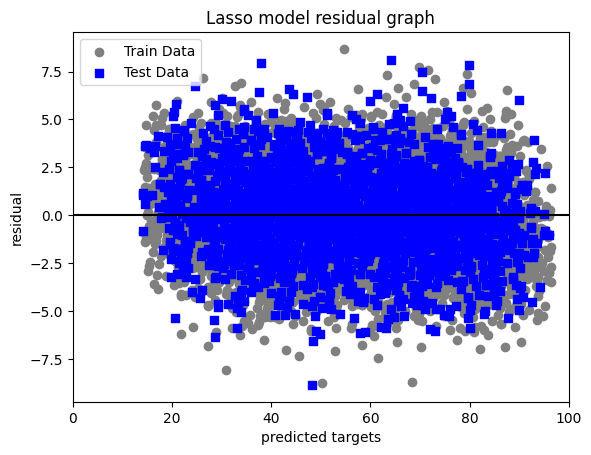

In [8]:
# 잔차 그래프
# Lasso model
plt.scatter(pred_y_train1, pred_y_train1 - y_train, c='gray', marker='o', label='Train Data')
plt.scatter(pred_y_test1, pred_y_test1 - y_test, c='blue', marker='s', label='Test Data')
plt.legend()
plt.xlabel('predicted targets')
plt.ylabel('residual')
plt.xlim([0,100])
plt.title("Lasso model residual graph")
plt.hlines(y=0, xmin=0, xmax=100, colors='black')
plt.show()

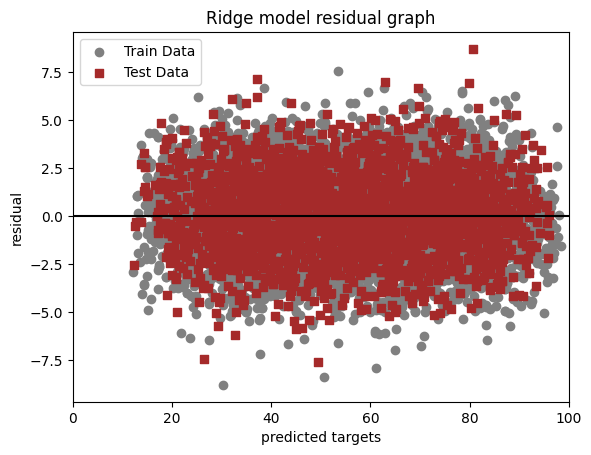

In [9]:
# Ridge model
plt.scatter(pred_y_train2, pred_y_train2 - y_train, c='gray', marker='o', label='Train Data')
plt.scatter(pred_y_test2, pred_y_test2 - y_test, c='brown', marker='s', label='Test Data')
plt.legend()
plt.xlabel('predicted targets')
plt.ylabel('residual')
plt.title("Ridge model residual graph")
plt.xlim([0,100])
plt.hlines(y=0, xmin=0, xmax=100, colors='black')
plt.show()

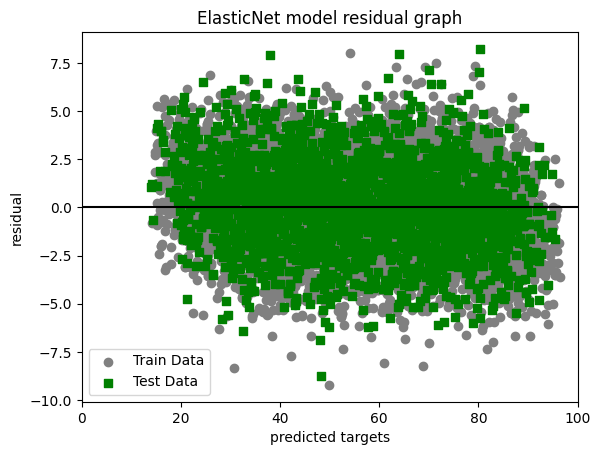

In [10]:
# ElasticNet model
plt.scatter(pred_y_train3, pred_y_train3 - y_train, c='gray', marker='o', label='Train Data')
plt.scatter(pred_y_test3, pred_y_test3 - y_test, c='green', marker='s', label='Test Data')
plt.legend()
plt.xlabel('predicted targets')
plt.ylabel('residual')
plt.title("ElasticNet model residual graph")
plt.xlim([0,100])
plt.hlines(y=0, xmin=0, xmax=100, colors='black')
plt.show()

In [11]:
# 선형회귀 모델 평가
# MSE(mean squared error)
mse_train1, mse_test1 = mean_squared_error(y_train, pred_y_train1), mean_squared_error(y_test, pred_y_test1)
mse_train2, mse_test2 = mean_squared_error(y_train, pred_y_train2), mean_squared_error(y_test, pred_y_test2)
mse_train3, mse_test3 = mean_squared_error(y_train, pred_y_train3), mean_squared_error(y_test, pred_y_test3)

print(f"Lasso -> MSE train: {mse_train1:.3f}, MSE test: {mse_test1:.3f}")
print(f"Ridge -> MSE train: {mse_train2:.3f}, MSE test: {mse_test2:.3f}")
print(f"ElasticNet -> MSE train: {mse_train3:.3f}, MSE test: {mse_test3:.3f}")

print("-"*30)
# R^2(결정계수)
print(f"Lasso -> R^2 train: {model1.score(X_train, y_train):.3f}, R^2 test: {model1.score(X_test, y_test):.3f}")
print(f"Ridge -> R^2 train: {model2.score(X_train, y_train):.3f}, R^2 test: {model2.score(X_test, y_test):.3f}")
print(f"ElasticNet -> R^2 train: {model3.score(X_train, y_train):.3f}, R^2 test: {model3.score(X_test, y_test):.3f}")

Lasso -> MSE train: 4.818, MSE test: 5.122
Ridge -> MSE train: 4.101, MSE test: 4.311
ElasticNet -> MSE train: 4.852, MSE test: 5.225
------------------------------
Lasso -> R^2 train: 0.987, R^2 test: 0.986
Ridge -> R^2 train: 0.989, R^2 test: 0.988
ElasticNet -> R^2 train: 0.987, R^2 test: 0.986


### 성능 비교 결과
- 잔차 그래프를 봤을 때는 세 모델의 큰 차이가 없음
- 평균제곱오차나 결정계수를 통해 확인한 결과, 근소한 차이로 Ridge 모델이 우수한 것으로 판명